Initial Setup

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')

In [5]:
data.head(10)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


**Time series analysis**

Text(0.5, 1.0, 'Air passenger traffic plot')

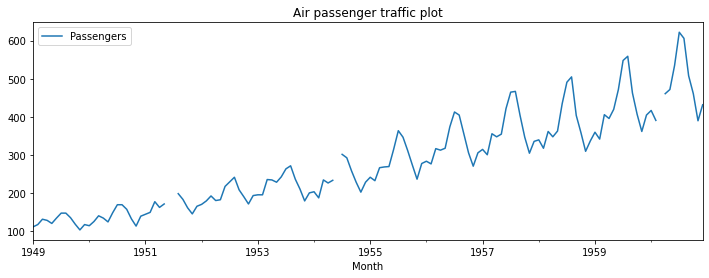

In [7]:
data.plot(figsize=(12,4))
plt.title('Air passenger traffic plot')

We see there is a missing data in the given time series. 
We can observe also seasonality in the given data.
Lets fill the missing value with some estimates
Data missing will occur due to 2 main reasons
1. System reason: In this case due to some system issue because of which data could not found in those time. Ex: Store was closed during a period of day and hence data was not generated for that time.
2. System/Human error: In this case we miss to record the data.

1. Mean Imputation: Imputing the missing values with the overall mean of the data
2. Last observation carried forward: We impute the missing values with its previous value in the data.
3. Linear interpolation: You draw a straight line joining the next and previous points of the missing values in the data.
4. Seasonal + Linear interpolation: This method is best applicable for the data with trend and seasonality. Here, the missing value is imputed with the average of the corresponding data point in the previous seasonal period and the next seasonal period of the missing value.

Text(0.5, 1.0, 'Air passenger traffic plot with mean inputation')

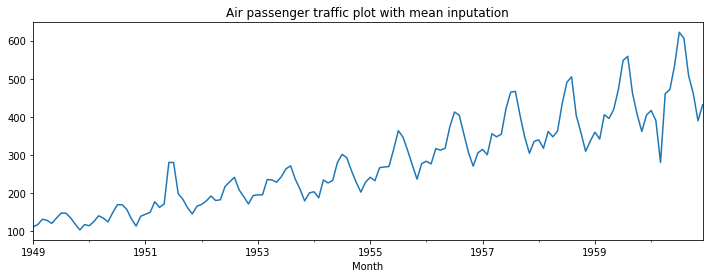

In [11]:
#Mean imputation
data = data.assign(Passenger_mean_imputation = data.Passengers.fillna(data.Passengers.mean()))
data['Passenger_mean_imputation'].plot(figsize=(12,4))
plt.title('Air passenger traffic plot with mean inputation')

Text(0.5, 1.0, 'Air passenger traffic plot with linear inputation')

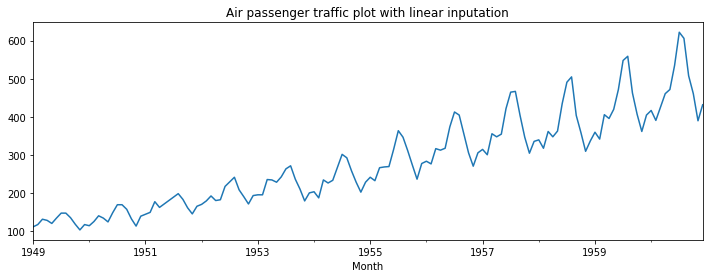

In [15]:
##Linear interpolation
data = data.assign(Passenger_linear_imputation = data.Passengers.interpolate(method='linear'))
data['Passenger_linear_imputation'].plot(figsize=(12,4))
plt.title('Air passenger traffic plot with linear inputation')

**Handling Outliers**

Method of detecting outliers:
1. Extreme value analysis: Remove the smallest and largest values in the dataset.
2. Box Plot: The points lying on either side of the whiskers are considered to be outliers. The length of these whiskers is subjective and can be defined by you according to the problem.
3. Histogram: Simply plotting a histogram can also reveal the outliers - basically the extreme values with low frequencies visible in the plot.

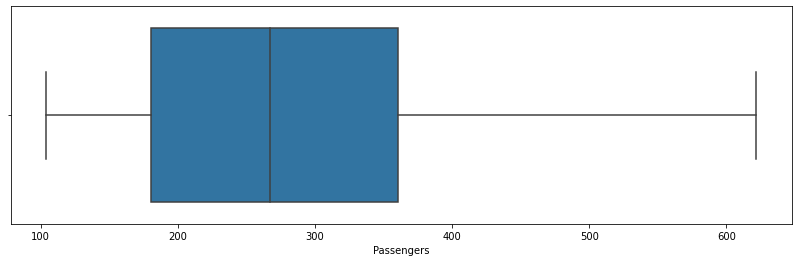

In [42]:
import seaborn as sns;
fig = plt.subplots(figsize=(14,4))
sns.boxplot(x=data.Passengers, whis=1.5)

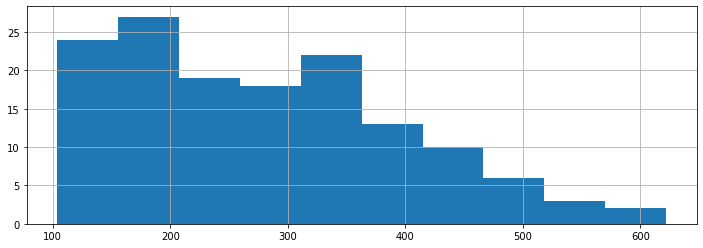

In [43]:
data.Passengers.hist(figsize=(12,4))

From above two plots it is evident that no outliers are present in the given data.

**There are two ways in which the time series data can be decomposed**:
 
1. Additive Seasonal Decomposition - the individual components can be added to get the time-series data
2. Multiplicative Seasonal Decomposition - the individual components can be multiplied to get the time-series data

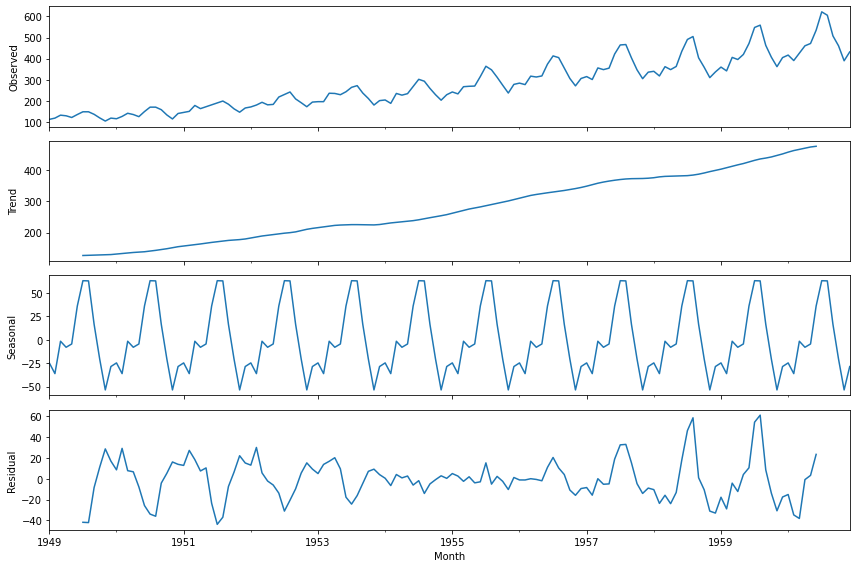

In [46]:
##Additive Seasonal Decomposition 
from pylab import rcParams;
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()

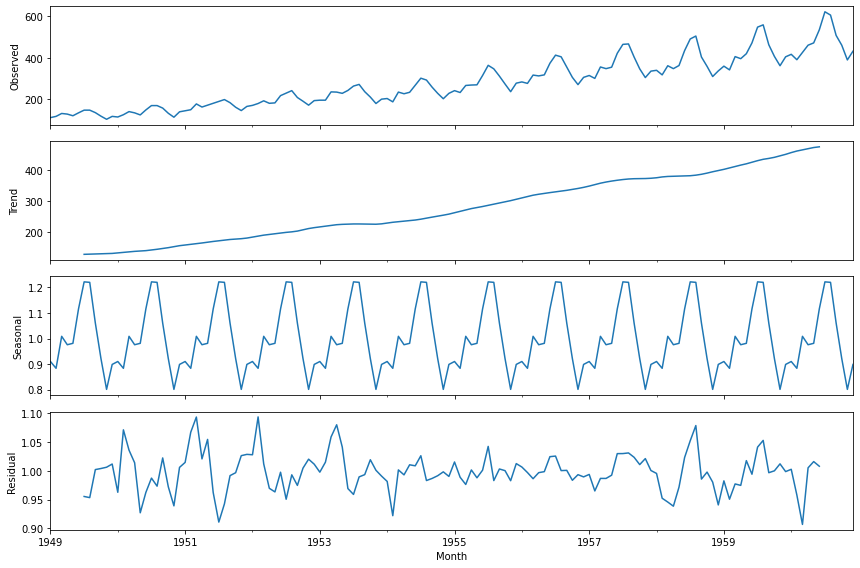

In [47]:
##Multiplicative Seasonal Decomposition
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()